# Text Analysis

# **Preparing text data for analysis**

## **Importing data**

Gathering text data can be a task in and of itself--and for this class we will not cover the [art of scraping](https://www.dataquest.io/blog/web-scraping-tutorial-python/) in this class. This is because typically people analytics teams are focused on text data that is already contained in a structured format, like in CSV or excel files--which is typical of survey data or data extracts from company information systems. This is what we will focus on in this class.


## **Data for this lesson**

We'll focus on the results of a 2015 community survey done in the city of Austin, TX, where residents were asked:

What community resources do we have? 

* What community resources do we have?
* **What community resources are we missing?** -- This is the question we will focus on the most in this exercise.
* What’s one thing you could have to improve the quality of life? 
* What’s one thing I can do to make a difference? 
<br>
<br>

**Citation:**

Public Information Office. (2016). Spirit of East Austin Comments (3.1). City of Austin, Texas Open Data. https://doi.org/10.26000/037.000003


In [ ]:
import pandas as pd

In [ ]:
#load in and explore the data
surveydat=pd.read_csv('https://data.austintexas.gov/resource/wj2d-jcey.csv')

surveydat.tail()



,theme,category,comment,zip_code
995,Neighborhood Character & Values,Resources,Healthcare is a growing field for potential em...,78702
996,Neighborhood Character & Values,Resources,"People are our assets - New, old and all of th...",NaN
997,Neighborhood Character & Values,Resources,"DeWitty Center, Dr. Brown, AC/TV, KAZI, Willia...",78702
998,Neighborhood Character & Values,Resources,Austin Public Library branches,78741
999,Neighborhood Character & Values,Resources,"The legacy of African American culture, art, a...",78702


In [ ]:
surveydat['category'].value_counts()

Resources                   239
What's Missing              231
Wisdom                      192
Personal Experience          97
One Thing To Improve         88
Personal Experience          72
One thing to improve QoL     45
One thing to improve QOL     14
Ideas I Bring                13
Why am I here                 9
Name: category, dtype: int64

Note: Category refers to the questions in the bullets above; theme is a column added by an analyst to categorize the comment further.

## **Cleaning text data**

Text data is filled with information that makes interpretation and processing difficult. Throughout this tutorial, you'll see some examples of cleaning text data to control for things like:

* Punctuation
* Different cases of letters
* Odd characters
* Different languages
* Words with low meaning (compared to words that surround them; e.g. and, but, the, of).
* Controlling for plurality, progressive tense, past tense (met, meeting, meetings = "meet"; this is called **lemmatization**)
* Hash tags
* URLs
* Other things that make sense to machines but not humans.

In the exercises below, we will highlight some of these techniques.

## **Regular Expressions (RegEx)**

Regular expressions are incredibly useful to identify and process text data. This is almost a language itself-- it allows you to specify exact or abstract patterns in text to extract or replace text based on the pattern. Examples include:

* Find comments that contain a number (e.g. `[0-9]`)
* Find comments that contain more than one number (e.g. `[0-9]+` )
* Find comments that end in the word "pasta" (e.g. `pasta$`)
* Find comments that contain a URL or hashtag (e.g. `\#` or `http[s]?://.+`)

Here is an incredibly useful [cheatsheet](https://www.debuggex.com/cheatsheet/regex/python) for using RegEx

Also, it can be very useful to use a [RegEx testing tool](https://www.debuggex.com/?flavor=python) to see whether or not a Regular Expression you've written will work when you put it into your code.


# **Extracting comments containing key words**

Often in survey data, we look for the mention of specific words or phrases. Regular expressions can help with this quickly. 


In [ ]:
#we'll use .str.contains() on our comment variable to create a filter that contains our comments
education_comment_filter=surveydat['comment'].str.contains(pat='educat.+', #pat means pattern we're looking for; here we are providing a regular expression
                                                           case=False) #case means we don't care about upper/lower case variants of the match

education_comment_filter

0       True
1      False
2       True
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: comment, Length: 1000, dtype: bool

In [ ]:
#next, let's just look at those comments mentioning education
surveydat.loc[education_comment_filter].head(15)

,theme,category,comment,zip_code
0,Education,Wisdom,That a lot of people are about education,NaN
2,Education,Wisdom,Cuts by state. Disparity in education funding....,NaN
8,Education,Wisdom,People are hungry for change in education outc...,NaN
10,Education,Personal Experience,Asian-American Cultural Center. To help build ...,NaN
13,Education,Personal Experience,Education should build character - happens in ...,78751
14,Education,Personal Experience,Early childhood education - change the paradigm!,NaN
18,Education,Personal Experience,Children not getting the experiences they need...,NaN
22,Education,Personal Experience,I'm interested in access to quality education ...,78723
24,Education,Personal Experience,Texas educates one of the largest educators of...,NaN
27,Education,Personal Experience,Need high-quality education options for young ...,78724


Sometimes we may want to look at a variety of keywords. This is easy with a for loop, and we can even add a new column that allows us to filter on the keywords we care about.

This can be important for cultural initiatives, compliance purposes, etc.

In [ ]:
#add the keywords i care about to a list
keywords_i_care_about=['education','healthcare','crime','recreation']

#make a blank list where we will put in the dataframes containing comments
keyword_comments_dataframe_list=[]

#run the loop
for keyword in keywords_i_care_about:
  #make a filter just for the keyword
  keyword_filter=surveydat['comment'].str.contains(pat=keyword,case=False)
  #create a new dataframe containing comments with just the keyword
  keyword_dat=surveydat.loc[keyword_filter].copy()
  #make a new column with the keyword in it
  keyword_dat['keyword']=keyword
  #then add the data to the dataframe list we made above
  keyword_comments_dataframe_list.append(keyword_dat)

#then combine all of the data together from the list into a single dataframe using pd.concat
keyword_comments=pd.concat(keyword_comments_dataframe_list)

keyword_comments


,theme,category,comment,zip_code,keyword
0,Education,Wisdom,That a lot of people are about education,NaN,education
2,Education,Wisdom,Cuts by state. Disparity in education funding....,NaN,education
8,Education,Wisdom,People are hungry for change in education outc...,NaN,education
10,Education,Personal Experience,Asian-American Cultural Center. To help build ...,NaN,education
13,Education,Personal Experience,Education should build character - happens in ...,78751,education
...,...,...,...,...,...
471,Family Support,One Thing To Improve,More publicity about parks and recreation faci...,78721,recreation
524,Family Support,Resources,Community Recreation Centers are under utilize...,78745,recreation
527,Family Support,Resources,"Schools, YMCA, Boys -n- Girls Club, Carver Lib...",NaN,recreation
742,Housing and Affordability,What's Missing,Up keep and additional recreation spaces. We n...,78711,recreation


# Exploring key themes 

## Top words (unigrams)

Sometimes we can gather a lot of meaning by looking at the number of times a word is mentioned in text. 

This is called **unigram frequency** analysis. 

In [ ]:
# Combine all reviews into a single text block
comment_text = " ".join(surveydat.loc[surveydat['category']=="What's Missing",'comment'])
# Convert all review words to lower case
comment_text = comment_text.lower()
# Split the words based on spaces
comment_text_list = comment_text.split()
# Convert each word into a Pandas Series
word_list = pd.Series(comment_text_list)
# Sort according to value_counts
value_counts = word_list.value_counts()
# View top 50 words
value_counts[:50]

and            61
to             61
for            54
of             38
need           30
more           28
-              25
in             25
affordable     21
we             19
east           19
the            19
housing        18
services       18
health         18
a              16
is             16
are            16
people         13
education      13
access         12
on             12
/              11
support        10
have           10
food           10
with           10
public         10
community      10
that            9
development     9
austin          9
care            9
needs           9
missing         8
programs        8
can             8
family          8
healthy         8
lack            8
not             8
what            8
funding         8
who             7
city            7
resources       7
grocery         7
money           7
job             7
families        7
dtype: int64


Notice when we look at these words, some of them are the same.
e.g. work + working, team + teams
We can resolve this using **stemming** or **lemmatization**.

Also, we have a lot of words that are not meaningful by themselves (as, it, my, how, the, etc.)-- these are called **stop words** and we can leverage existing libraries in Python to remove them for our anlaysis. 

Let's do both.

### **Stop words**

After we break apart a body of text into tokens (words, punctuation, etc.--basically units of text), we can use the `spacy` library to help us do this quite quickly 

In [ ]:
#first, let's bring in a couple of libraries that will help us work with the English language well

import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

#combine all comments into a single body of text
comment_text = " ".join(surveydat.loc[surveydat['category']=="What's Missing",'comment'])
comment_text= comment_text.lower()
doc = nlp(comment_text) #convert body of text to a "document" that the nlp object we made above can understand

# make a blank word list
word_list = []

# Get all words into that list
for token in doc: #get each word in the document
  if not token.is_punct: #remove punctuation
    if token.text!=' ': #remove spaces
      if not token.is_stop: #REMOVE STOP WORDS
        word_list.append(token.text)
    
# Convert the list into a Pandas Series
word_list = pd.Series(word_list)
# Sort according to value_counts
value_counts = word_list.value_counts()
# View top 50 words
value_counts[:50]

need              32
housing           25
affordable        23
health            21
services          21
east              20
austin            17
education         17
access            15
people            14
food              13
community         12
missing           12
support           11
programs          11
development       11
public            10
needs             10
funding           10
family             9
jobs               9
city               9
care               9
resources          9
families           9
money              9
business           8
lack               8
healthy            8
better             8
training           7
income             7
grocery            7
economic           7
job                7
clinics            7
aisd               7
stores             6
transportation     6
good               6
african            6
medical            6
land               6
healthcare         6
bilingual          6
language           6
shopping           6
county       

### Lemmatization

Notice above we have the same word or concept but pluralized or in a different tense. We can walk the word back to its *lemma* by doing one small tweak to the code above:


In [ ]:

#combine all comments into a single body of text
comment_text = " ".join(surveydat.loc[surveydat['category']=="What's Missing",'comment'])
comment_text= comment_text.lower()
doc = nlp(comment_text) #convert body of text to a "document" that the nlp object we made above can understand

# make a blank word list
word_list = []

# Get all words into that list
for token in doc: #get each 
  if not token.is_punct:
    if not token.is_stop:
      if token.text!=' ':
        word_list.append(token.lemma_) ####HERE is the only change (take the lemma of the token)
    
# Convert the list into a Pandas Series
word_list = pd.Series(word_list)
# Sort according to value_counts
value_counts = word_list.value_counts()
# View top 50 words
value_counts[:50]

need              45
housing           25
service           25
affordable        23
health            21
east              20
family            18
food              17
education         17
austin            17
job               16
program           16
community         15
access            15
people            14
business          11
resource          11
development       11
support           11
help              10
public            10
care               9
home               9
money              9
city               9
center             8
economic           8
know               8
healthy            8
lack               8
grocery            8
training           7
income             7
store              7
clinic             7
funding            7
fund               7
good               7
school             7
well               7
miss               7
aisd               7
african            6
bilingual          6
language           6
high               6
land               6
shopping     

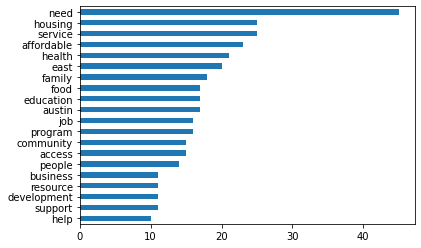

In [ ]:
ax=value_counts[:20].plot(kind='barh')
ax.invert_yaxis()

## **Top two-word combinations (bigrams)**

Single words only give us so much information about the general nature of the text we are interested in. Sometimes having the accompanying text next to a single word is needed to get the full context.

One way we can do this is by extracting *two word combinations* (**bigrams**) from our text. This is very similar to what we did up above:



In [ ]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#for this example, we will use the nltk package - note modyfing code below could give unigrams like we did using SpaCy above :)
from nltk.corpus import stopwords 

#combine all comments into a single body of text
comment_text = " ".join(surveydat.loc[surveydat['category']=="What's Missing",'comment'])

#grab tokens that are only words
tokenizer = nltk.RegexpTokenizer(r"\w+") #we're telling this tokenizer to only grab words using a regular expression \w (word)
clean_words = tokenizer.tokenize(comment_text)

#now take out stop words
stop_words = set(stopwords.words('english')) #if you get an error you will need to run nltk.download('stopwords') to download stopword data

clean_words_stopwords_removed=[w.lower() for w in clean_words if not w in stop_words] 

#now extract bigrams

n_grams = nltk.ngrams(clean_words_stopwords_removed, 2)
n_grams_list=[ ' '.join(grams) for grams in n_grams] #join the ngrams together into a single string

bigrams_df=pd.DataFrame({'bigram':n_grams_list}) #put it into a pandas dataframe

bigrams_df.head(10)

,bigram
0,what missing
1,missing early
2,early literacy
3,literacy family
4,family reading
5,reading practices
6,practices need
7,need training
8,training teachers
9,teachers assessment


Let's compare this to the first comment in our dataset to see exactly what `nltk.ngrams` is producing 

In [ ]:
surveydat.loc[surveydat['category']=="What's Missing",'comment'].reset_index().iloc[0,1]

"What's missing? Early literacy and family reading practices. "

Now, let's just do value_counts to get the most bigrams in our data

In [ ]:
bigram_frequency=bigrams_df['bigram'].value_counts()
bigram_frequency=bigram_frequency.rename('count')
bigram_frequency=pd.DataFrame(bigram_frequency) #the line above makes a series, let's make it a dataframe
bigram_frequency.head(20)

,count
affordable housing,15
east austin,11
we need,6
grocery stores,5
health services,4
african american,4
food access,3
45 000,3
middle class,3
health clinics,3


## **Top noun phrases**

Similar to bigrams are noun phrases. According to [spacy documentation](https://spacy.io/usage/linguistic-features):

> You can think of noun chunks as a noun plus the words describing the noun

This is another useful tool we can put into our text analysis toolbox to help us understand a body of tet. 



In [ ]:
#We need to iterate over every comment in the document, so our code will look a bit different than the unigram example above

#start by making an empty noun phrase list
master_np_list = []

#then iterate over every comment in our dataframe
for index, row in surveydat.loc[surveydat['category']=="What's Missing",:].iterrows():
  review = row["comment"]
  doc = nlp(review)
  doc_np_list = []
  for np in doc.noun_chunks: 
    doc_np_list.append(np.lemma_)
  # Add the noun phrases in the document to the master noun phrase list
  master_np_list += doc_np_list  #+= is a shortcut for appending lists :)

# Convert each nounphrase into a Pandas Series
np_series = pd.Series(master_np_list)
# Sort according to value_counts
value_counts = np_series.value_counts()
# View top 50 words
value_counts[:50]

-PRON-                                      39
people                                      10
what                                         8
lack                                         8
affordable housing                           8
East Austin                                  7
who                                          7
education                                    6
job                                          4
access                                       4
sidewalk                                     4
Austin                                       4
service                                      4
resource                                     4
home                                         3
awareness                                    3
family                                       3
resident                                     3
affordability                                3
healthy food                                 3
health                                       3
no money     

# Relationships between words

Above we created bigrams and counted their frequencies. This is one way to gather meaning of topics.

But what if we wanted to see how words are related? We can leverage bigrams in a similar way by looking at a network view of the data to understand co-occurences of words.  


In [ ]:
# Create dictionary of bigrams and their counts for bigrams that appear at least 3 times

d = bigram_frequency.loc[bigram_frequency['count']>1,:].T.to_dict('records') #we need to convert our bigram datframe to a dictionary for next steps


#create a map that draws connections between bigrams with common words - aka a word network!
import networkx as nx

G = nx.Graph() #create a network space for the words called G

for key, value in d[0].items(): 
    G.add_edge(key.split(' ')[0], key.split(' ')[1], weight=(value * value)) #this draws a line between words based on the frequency count




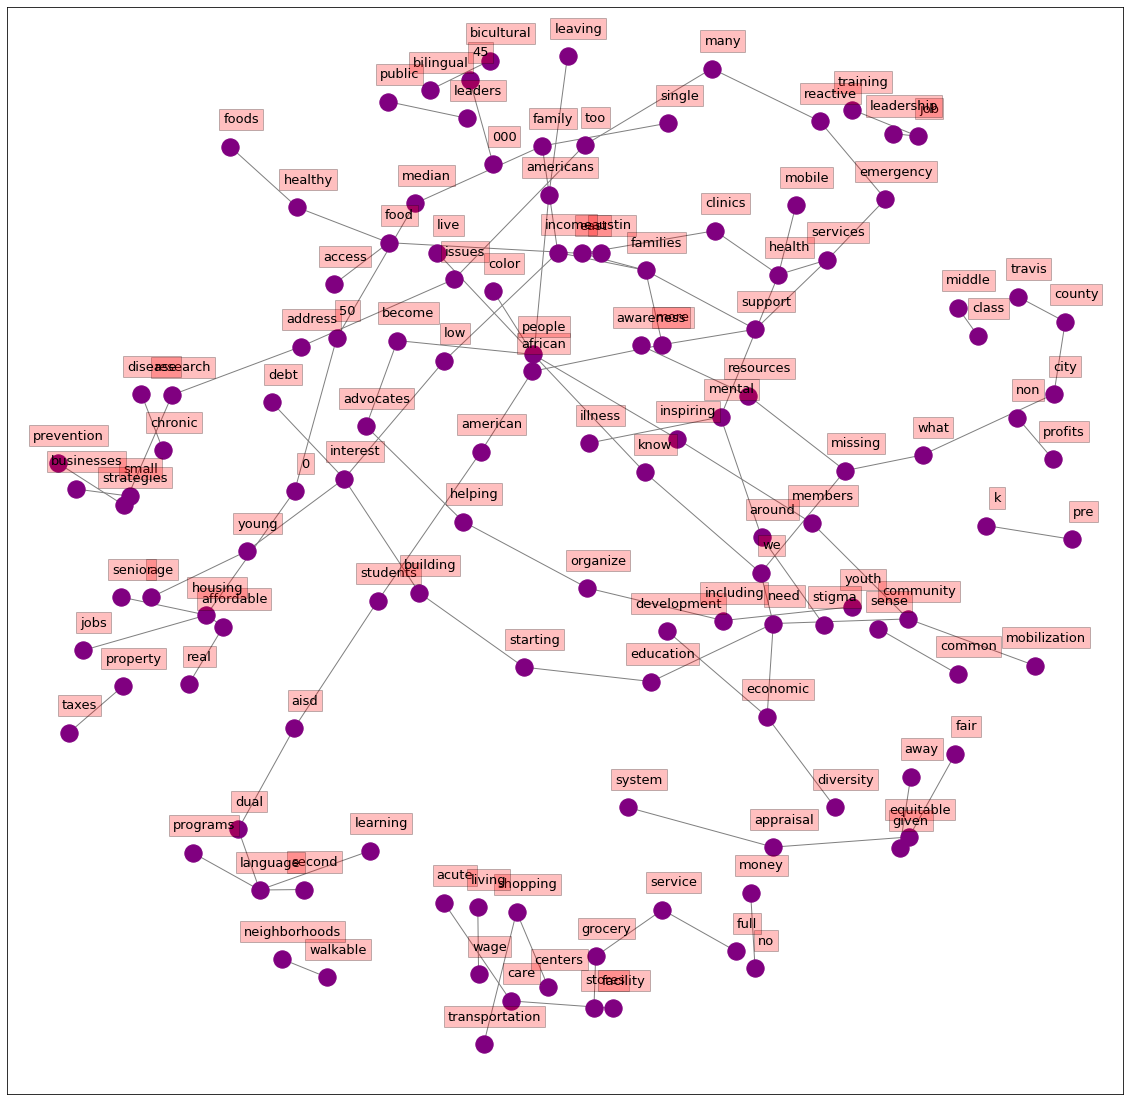

In [ ]:
import matplotlib.pyplot as plt #we need this library to graph

#now plot the graph 
fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G,k=.4) 

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.02, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
plt.show()